# Studying the Titanic Dataset and Applying Machine Learning

## Importing all the packages and files that we will use

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('file:///C:/Users/mkassir/Downloads/train.csv')
df_test = pd.read_csv('file:///C:/Users/mkassir/Downloads/test.csv')

## Taking a look at the data table 

In order to know how to deal with the data, we need to take a look at the data table and summaries of the data.

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We start by taking a quick look at the data table. The data informs us who survived, and also gives us details about each person such as name and age. We will attempt to use all the relevant columns to predict who would survive and who would not.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


A summary of the data lets us know we are working with 891 individuals, but it also informs us of a few issues we need to deal with. The first is that the "Age" and "Embarked" columns are missing some values. A second issue is that the columns fall into different types, which needs to be modified if we plan to run a machine learning algorithm.

In [4]:
df.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

The mean of the data shows us that only 38 percent of the people in the data set survived. It also tells us that a large portion of our sample did not have a sibling, spouse, parent, or child with them. There seems to be a good amount of people from all 3 classes.

## Finding the useful columns

One import part to running an alogrithm is knowing which parts of the data is useful and which part will just add unnecessary noise that will weaken the algorithm. We will figure this out by finding the columns that are correlated with survival rate.

To determine whether the "Sex" and "Embarked columns" have any significance, we will turn them into numerical values.

In [5]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


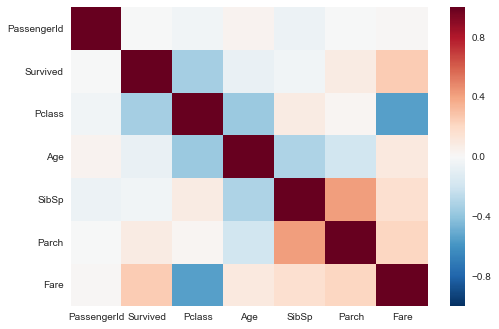

In [6]:
df_corr = df.corr()
sns.heatmap(df_corr, xticklabels=df_corr.columns.values, yticklabels=df_corr.columns.values)
plt.show()

The first table numarically shows how all the columns are related, while the second show the same information through color.

Looking at the columns for the "Survived" row, we see that the "Pclass" column, which represents the class of the person who board the ship, and the "Fare" column, which represents the amount of money the person played, are the most important. This hints that wealth was the most important factor for survive, especially since the two columns are correlated with each other. The "Sex" columns seems to bear 

The rest of the columns, with the exception of "PassengerId", seem to matter to a minor extent. 

Next we will drop the "Name", "Ticket", and "Cabin" columns becuase each value is unique and not much useful information can be drawn from these. "PassengerId" will be droped becuase the individuals are already numbered in rows.

In [7]:
df = df.drop(['Name','Ticket', 'Cabin', 'PassengerId'], axis=1)

To determine whether the "Sex" and "Embarked columns" have any significance, we will turn them into numerical values.

In [8]:
df = pd.get_dummies(df)

In [9]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.081720
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.070941
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.166603
Sex_female,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.125722
Sex_male,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,0.074115,-0.074115,-0.148258,1.000000,-0.496624


"Sex" is highly correlated. Interestingly, embarking from areas "C" and "S" seem to be significant, but not embarking from area "Q". As a result will will drop the column for area "Q". We will also drop the "Sex_female" column becuase not being male autimatically makes the individual a female.

In [10]:
df = df.drop(['Sex_female','Embarked_Q'], axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.4 KB


## Dealing with Missing Data

Now we need to address the missing values in the "Age" column. To do so, we will replace the unknown ages wit the average age. 

In [12]:
df = df.fillna(df.mean())

## Making all our data the same type

We also need to convert all our data into floats so that all the data will be the same type

In [13]:
df = df.astype(float)

## Creating the training set for our data

Since we are going to train our data to predict who would survive depending on all their information, we need to seperate the "Survived" column from the rest of the data.

In [14]:
df_survive = df['Survived']
df_features = df.drop(['Survived'],axis=1)

We will now split the set given to us into a training set and a testing set.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_survive, test_size = 0.3, random_state=10)

## Running a machine learning algorithm

After trying different algorithms, I found that the Random Forest Classifier does the best job. Modifying the parameters slightly increased the accuracy.

In [16]:
clf = RandomForestClassifier(n_estimators=30, min_samples_split =7)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print accuracy_score(pred, y_test)

0.813432835821


## Submitting it to Kaggle

Kaggle has its own test set that it uses to test our algorithms. It gives us access to the information about the individuals of their test set but doesn't tell us if they survive. This is done so so that we can submit our algorithms, and the website gives us the accuracy of our model. 

Now that I found the optimal algorithm based on using the data that contains information of their survival, I can use the whole set given to us as a training set and submit it to Kaggle to see how my algorithm preforms on their test set.

In [17]:
X_train = df_features
y_train = df_survive

Now we can apply the algorithm:

In [18]:
clf = RandomForestClassifier(n_estimators=30, min_samples_split =7)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=7, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

We can now use the features of their test set to make our predicton. But first we need to fix data the same why we fixed the training data. We will just apply all the same functions again. However, we need to save the Passenger Id's to index the predictions to them.

In [19]:
df_pred_index = df_test['PassengerId'] 

In [20]:
df_test = df_test.drop(['Name','Ticket', 'Cabin', 'PassengerId'], axis=1)
df_test = pd.get_dummies(df_test)
df_test = df_test.drop(['Sex_female','Embarked_Q'], axis=1)
df_test = df_test.fillna(df_test.mean())
df_test = df_test.astype(float)
X_test = df_test

To make our prediction:

In [21]:
pred = clf.predict(X_test)

Next we will use the Passenger Id's as the index.

In [22]:
df_submit = pd.DataFrame(pred)
df_submit.columns = ['Survived']
df_submit = df_submit.set_index(df_pred_index)

Lets just make sure it looks good first:

In [23]:
df_submit.head()

,Survived
PassengerId,
892,0.0
893,0.0
894,0.0
895,0.0
896,1.0


Now we can submit:

In [24]:
df_submit.to_csv('Titanic_Dataset.csv')